In [5]:
import pandas as pd
import numpy as np
from utils import reduction_function as rfun
from utils import polarization_function as pfun
import networkx as nx
import csv 
import matplotlib.pyplot as plt

In [4]:
june_df = pd.read_csv("../output_network/stance_df_june.csv", sep = "\t", encoding = "utf-8", quoting = csv.QUOTE_NONE )
dec_df = pd.read_csv("../output_network/stance_df_december.csv", sep = "\t", encoding = "utf-8", quoting = csv.QUOTE_NONE )

### Distribution of each topic stance for each month

In [19]:
def plot_c_subplot(df, color_topics, month, n_bins = 15, num_plots = 3):
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 5), sharey=True)

    for i in range(num_plots):
        topic = color_topics[i]
        axes[i].hist(df[topic], bins = n_bins)
 
        axes[i].set_xlabel('user stance')
        axes[i].set_ylabel('frequency')

        axes[i].set_title(f'Distribution of {topic} in {month}')
 
    plt.tight_layout()
    plt.show()

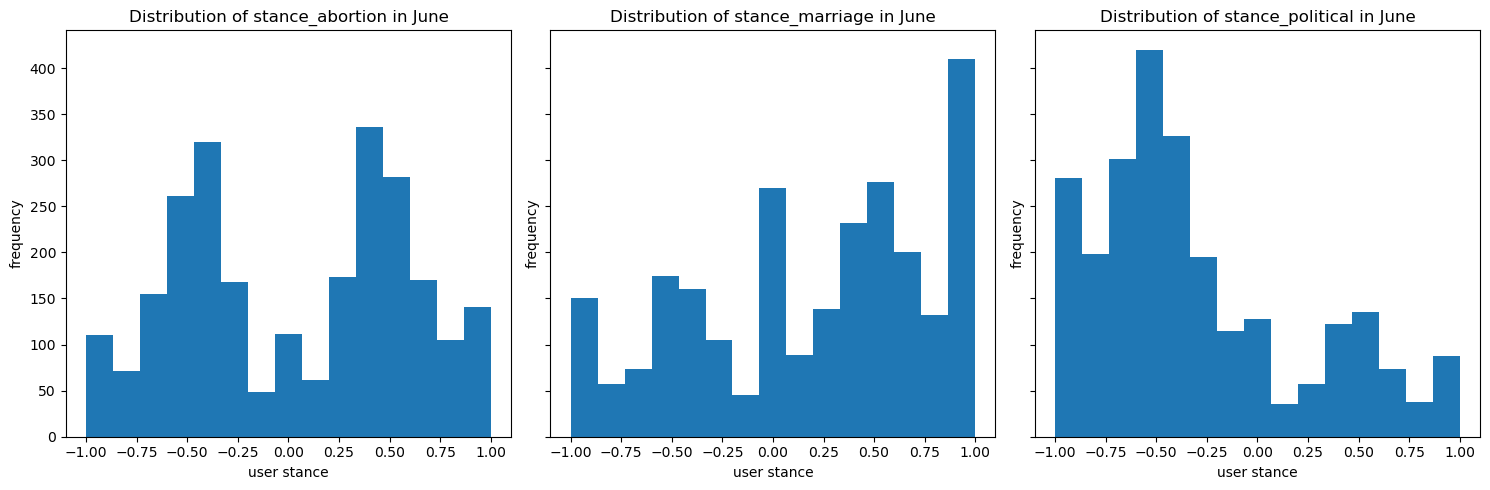

In [20]:
plot_c_subplot(june_df, ["stance_abortion", "stance_marriage", "stance_political"], month = "June")

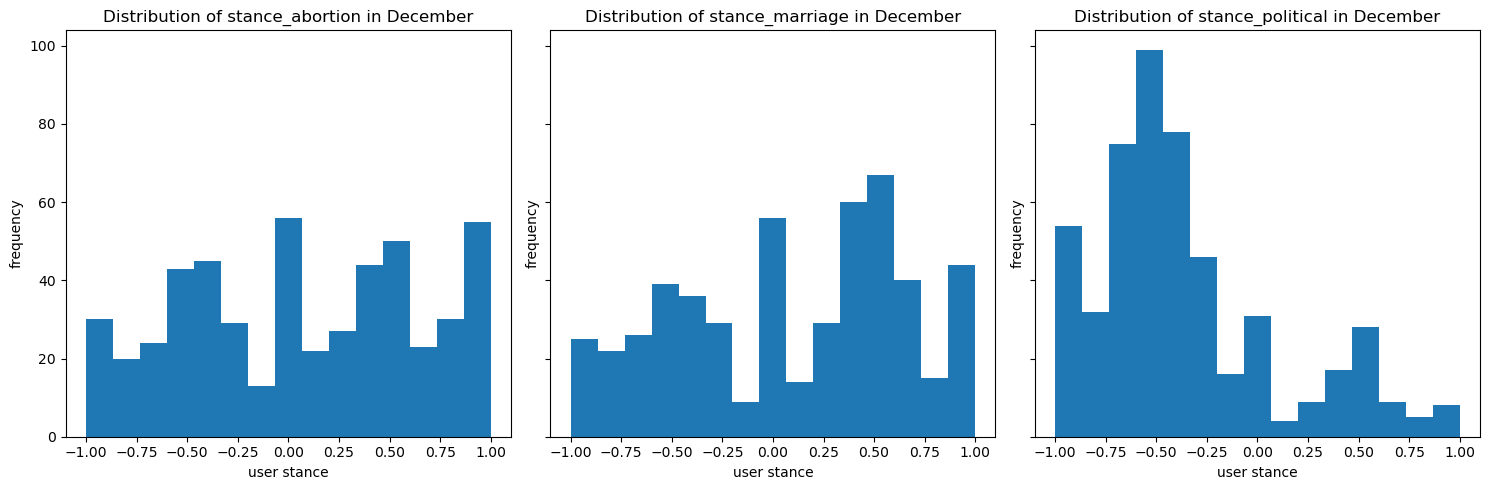

In [21]:
plot_c_subplot(dec_df, ["stance_abortion", "stance_marriage", "stance_political"], month = "December")

### Networks statistics 

In [ ]:
june_dict = june_df.set_index('nodeid')['pca_component_scaled'].to_dict()
dec_dict  = dec_df.set_index('nodeid')['pca_component_scaled'].to_dict()

In [22]:
net_file = pd.read_csv("../output_network/network_filtered_june.csv", sep="\t")
G_june = nx.from_pandas_edgelist(net_file, "src", "trg")
print(G_june)

Graph with 2514 nodes and 23700 edges


In [23]:
net_file = pd.read_csv("../output_network/network_filtered.csv", sep="\t")
G_dec = nx.from_pandas_edgelist(net_file, "src", "trg")
print(G_dec)

Graph with 511 nodes and 2785 edges


In [43]:
# setting the attributes 
nx.set_node_attributes(G_june, june_dict, name="pol_score")
nx.set_node_attributes(G_dec, dec_dict, name="pol_score")
print(G_june.nodes[911729]['pol_score'])
print(G_dec.nodes[1232857]['pol_score'])

-0.3719542900291201
0.053076728245611


In [ ]:
# checks 
print(june_df[june_df["nodeid"] == 911729]["pca_component_scaled"])
print(dec_df[dec_df["nodeid"] == 1232857]["pca_component_scaled"])

0   -0.371954
Name: pca_component_scaled, dtype: float64
0    0.053077
Name: pca_component_scaled, dtype: float64
